In [1]:
#!pip install portalocker>=2.0.0

In [2]:
#pip install scikit-plot

In [3]:
import re

In [4]:
from torch.utils.data import Dataset, DataLoader

In [5]:
import gensim.downloader

In [6]:
import torch

In [7]:
w2v = gensim.downloader.load('word2vec-google-news-300')

In [8]:
torch.tensor(w2v["home"]) 

tensor([-0.0118,  0.0796,  0.0168, -0.0898,  0.0864,  0.0242,  0.0255, -0.1895,
         0.1416,  0.0845,  0.1699, -0.2500, -0.0535, -0.0283,  0.0454, -0.1475,
         0.0123,  0.0564,  0.0195,  0.2158,  0.1572, -0.1592,  0.0884, -0.1060,
        -0.0041, -0.0233, -0.0493,  0.0815,  0.0381,  0.0018,  0.0552,  0.0374,
        -0.1465, -0.0381, -0.0552,  0.0114, -0.0786, -0.1494,  0.0903,  0.0371,
         0.0884, -0.0148,  0.1826,  0.0967, -0.0552,  0.1631,  0.0396,  0.1641,
         0.0840,  0.0280, -0.0344,  0.2969,  0.1406,  0.0986, -0.1846, -0.2637,
        -0.1211,  0.1826,  0.0228, -0.0425, -0.0206,  0.0825, -0.0014,  0.0225,
        -0.0762,  0.0271, -0.0471,  0.0564, -0.0025,  0.1133,  0.1289, -0.0967,
         0.0674, -0.0815, -0.1055,  0.0698, -0.0229,  0.0062,  0.0184, -0.0261,
         0.0579,  0.0771,  0.0102,  0.1797,  0.1299, -0.0471, -0.1670,  0.2471,
        -0.0303,  0.0522, -0.1475,  0.0674, -0.0562, -0.4863, -0.0077, -0.0269,
         0.0840, -0.0287, -0.0708, -0.08

In [9]:
from gensim.parsing.preprocessing import (preprocess_string,
                                          strip_tags,
                                          strip_punctuation,
                                          strip_multiple_whitespaces,
                                          strip_numeric,
                                          remove_stopwords)


# We pick a subset of the default filters,
# in particular, we do not take
# strip_short() and stem_text().
FILTERS = [strip_punctuation,
           strip_tags,
           strip_multiple_whitespaces,
           strip_numeric,
           remove_stopwords]

# See how the sentece is transformed into tokes (words)
preprocess_string('This is a "short" text!', FILTERS)

['This', 'short', 'text']

# Dataset Creation

In [10]:
import pandas as pd
#Load All_Beauty training, validation and testing split using read_csv from pandas library
#Write your code here
all_beauty_training_data = pd.read_csv(
    filepath_or_buffer='data/All_Beauty_Split_train.csv',
    sep=','
)

all_beauty_test_data = pd.read_csv(
    filepath_or_buffer='data/All_Beauty_Split_test.csv',
    sep=','
)

all_beauty_validation_data = pd.read_csv(
    filepath_or_buffer='data/All_Beauty_Split_val.csv',
    sep=','
)

In [11]:
#Load Gift Card training, validation and testing split using read_csv from pandas library
#Write your code here
gift_cards_training_data = pd.read_csv(
    filepath_or_buffer='data/Gift_Cards_Split_train.csv',
    sep=','
)

gift_cards_test_data = pd.read_csv(
    filepath_or_buffer='data/Gift_Cards_Split_test.csv',
    sep=','
)

gift_cards_validation_data = pd.read_csv(
    filepath_or_buffer='data/Gift_Cards_Split_val.csv',
    sep=','
)

In [12]:
#Concatenate the two splits to get a combined dataframe
#Write your code here
trainig_data = pd.concat([all_beauty_training_data, gift_cards_training_data], ignore_index=True)
test_data = pd.concat([all_beauty_test_data, gift_cards_test_data], ignore_index=True)
validation_data = pd.concat([all_beauty_validation_data, gift_cards_validation_data], ignore_index=True)

Display some data rows from the different datasets.

In [13]:
trainig_data.head(5)

,User_ID,Title,Text,Parent_asin,Timestamp,Rating
0,AFSKPY37N3C43SOI5IEXEK5JSIYA,Great for at home use and so easy to use!,This is perfect for my between salon visits. I...,B08P2DZB4X,1627391044559,5.0
1,AFSKPY37N3C43SOI5IEXEK5JSIYA,A little goes a long way!,This is a really nice moisturizing lotion. It ...,B07RBSLNFR,1621184430697,5.0
2,AFSKPY37N3C43SOI5IEXEK5JSIYA,Just ok,I try to get Keratin treatments every 3 months...,B07SLFWZKN,1619737501209,3.0
3,AFSKPY37N3C43SOI5IEXEK5JSIYA,Good quality hair brush!,"Really nice small brush. Made well, nice wood ...",B08JTNQFZY,1617904219785,5.0
4,AFSKPY37N3C43SOI5IEXEK5JSIYA,Great all natural ear swabs!,I really like these ear swabs. First they come...,B07KG1TWP5,1596473351088,5.0


In [14]:
test_data.head(5)

,User_ID,Title,Text,Parent_asin,Timestamp,Rating
0,AHTLWVDXSMG5YMVMEIWWOU6XBZMA,"Great idea, less than stellar delivery.","While I love the idea of this, the actual prod...",B09G22586Y,1659628417963,1.0
1,AH7LDXK3GT67FZKMRW7MP477DJVQ,Too big to hold comfortably.,I like that this is cordless amd portable but ...,B09G22586Y,1678171704867,2.0
2,AH7LDXK3GT67FZKMRW7MP477DJVQ,Great selection of implements.,This is a complete set for doing manicures or ...,B083J1Y349,1609032368011,4.0
3,AH6JLX5SJSUOJBBT6RRE2RDXIG6A,Likeable liquid lipstick,To me the shade on the product picture looks l...,B0BVQQ58G8,1658366200714,4.0
4,AH6JLX5SJSUOJBBT6RRE2RDXIG6A,Liking it,The skin on my neck has lost a lot of elastici...,B07PBWVV5K,1609465038183,5.0


In [15]:
validation_data.head(5)

,User_ID,Title,Text,Parent_asin,Timestamp,Rating
0,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,The cream is blue but goes on clear; it is ver...,The photo on Amazon must be wrong. This cream ...,B08HVRP54L,1653607216628,3.0
1,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,Light-weight cream that is a bit tacky to star...,This comes in a one gallon jug. There are two ...,B08N5NDVGH,1647381362768,3.0
2,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,Beautiful compact mirror w/high-gloss shine; n...,This is a nice set. It contains a beautiful co...,B092M5K59T,1638840554514,4.0
3,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,Cute MOM gift but not as fragrant or impressiv...,[[VIDEOID:f77804a8088c40dfbef6fdcfacf8b15a]] T...,B095CG2ZV1,1631367075148,3.0
4,AFXF3EGQTQDXMRLDWFU7UBFQZB7Q,Fragrance is subtle but lovely and floral; jus...,This is a nice room freshener. The fragrance i...,B08T7GPT1D,1625006698955,4.0


In [16]:
#Creating dataset class
class reviews(Dataset):
    def __init__(self,split):
        super(reviews,self).__init__()

        if split == 'train':
        #Give train dataframe
            df_data = trainig_data
        elif split == 'val':
        #Give validation dataframe
            df_data = validation_data
        elif split == 'test':
        #Give test dataframe
            df_data = test_data
        else:
            raise Exception(f"wrong split: {split}")
        #List for containing (input,output) pairs
        self.data = []
        #Make a list of ratings from df_data
        ratings = df_data['Rating']
        #Make a list of reviews from df_data
        text = df_data['Text']

        for i in range(len(text)):
            #Creating list of tokens for each review
            txt = preprocess_string(text[i], filters=FILTERS) # I used the filters from above
            #Appending (input,output) pairs to list
            if txt:
                self.data.append([txt,ratings[i]])

    def vectorise(self,txt):
        #Final tensor
        X_tensor = torch.zeros(300)
        l=0
        for i in txt:
          #Check if the word is in the vocabulary of word2vec
          if i in w2v:
            l = l+1
            #If so add it to the X_tensor
            X_tensor += torch.tensor(w2v[i])
        #Divide X_tensor by number of vectors that were added. This is called mean pooling
        X_tensor = (X_tensor / l) if l > 0 else X_tensor
            
        return X_tensor

    def __getitem__(self,index):
        sent_tensor = self.vectorise(self.data[index][0])
        return [sent_tensor,(self.data[index][1]-1)]
    def __len__(self):
        return len(self.data)

In [17]:
import torch

target_classes = ["1", "2", "3", "4", "5"]

train_dataset = reviews("train")
val_dataset = reviews("val")
test_dataset = reviews("test")

train_loader = DataLoader(train_dataset, batch_size=128)
val_loader = DataLoader(val_dataset, batch_size=128)
test_loader  = DataLoader(test_dataset, batch_size=128)

In [18]:
for X, Y in train_loader:
    print(X.shape, Y.shape)
    break

torch.Size([128, 300]) torch.Size([128])


# Model Training

In [19]:
from torch import nn
from torch.nn import functional as F

#Embedding dimension of Word2vec
embed_len = 300

#Create a Neural Network for mapping the reviews to probabilities of different ratings
class EmbeddingClassifier(nn.Module):
    def __init__(self):
        super(EmbeddingClassifier, self).__init__()
        #Create a Neural Network with input dimension embed_len, hidden dimensions 256,128,64 and output dimension the length of target class.
        #Use Relu as the activation function between each layer.
        self.seq = nn.Sequential(
            nn.Linear(embed_len, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, len(target_classes))
        )

    def forward(self, X_batch):
        return self.seq(X_batch)

In [20]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import gc

def CalcValLossAndAccuracy(model, loss_fn, val_loader):
    with torch.no_grad():
        Y_shuffled, Y_preds, losses = [],[],[]
        for X, Y in val_loader:
            #Predict output probabilities for all target classes for input X
            preds = F.softmax(model(X), dim=1)
            loss = loss_fn(preds, Y.long())
            losses.append(loss.item())

            Y_shuffled.append(Y)
            #Get the predicted class from the output probabilities: The class with the highest probability. Append to Y_preds list(use argmax)
            Y_preds.append(torch.argmax(preds, dim=1))

        Y_shuffled = torch.cat(Y_shuffled)
        Y_preds = torch.cat(Y_preds)

        print("Valid Loss : {:.3f}".format(torch.tensor(losses).mean()))
        print("Valid Acc  : {:.3f}".format(accuracy_score(Y_shuffled.detach().numpy(), Y_preds.detach().numpy())))

def TrainModel(model, loss_fn, optimizer, train_loader, val_loader, epochs=10):
    for i in range(1, epochs+1):
        losses = []
        for X, Y in tqdm(train_loader):
            #Predict output probabilities for all target classes for input X″
            Y_preds = model(X)
            loss = loss_fn(Y_preds, Y.long())
            losses.append(loss.item())

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        if i%5==0:
            print("Train Loss : {:.3f}".format(torch.tensor(losses).mean()))
            CalcValLossAndAccuracy(model, loss_fn, val_loader)

In [21]:
from torch.optim import Adam

epochs = 25
learning_rate = 1e-3

loss_fn = nn.CrossEntropyLoss()
embed_classifier = EmbeddingClassifier()
optimizer = Adam(embed_classifier.parameters(), lr=learning_rate)

TrainModel(embed_classifier, loss_fn, optimizer, train_loader, test_loader, epochs)

100%|██████████| 38/38 [00:01<00:00, 31.67it/s]


Train Loss : 0.659
Valid Loss : 0.995
Valid Acc  : 0.926


100%|██████████| 38/38 [00:01<00:00, 30.73it/s]


Train Loss : 0.614
Valid Loss : 0.988
Valid Acc  : 0.926


100%|██████████| 38/38 [00:01<00:00, 31.25it/s]


Train Loss : 0.589
Valid Loss : 0.984
Valid Acc  : 0.926


100%|██████████| 38/38 [00:01<00:00, 31.21it/s]


Train Loss : 0.548
Valid Loss : 0.976
Valid Acc  : 0.926


100%|██████████| 38/38 [00:01<00:00, 30.81it/s]

Train Loss : 0.491
Valid Loss : 0.965
Valid Acc  : 0.930


# Evaluation

In [22]:
def MakePredictions(model, loader):
    Y_shuffled, Y_preds = [], []
    for X, Y in loader:
        preds = model(X)
        Y_preds.append(preds)
        Y_shuffled.append(Y)
    gc.collect()
    Y_preds, Y_shuffled = torch.cat(Y_preds), torch.cat(Y_shuffled)

    return Y_shuffled.detach().numpy(), F.softmax(Y_preds, dim=-1).argmax(dim=-1).detach().numpy()

Y_actual_val, Y_preds_val = MakePredictions(embed_classifier, val_loader)

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Write code to get full classification report and print a confusion matrix for validation set
acc = accuracy_score(Y_actual_val, Y_preds_val)
report = classification_report(Y_actual_val, Y_preds_val)
conf = confusion_matrix(Y_actual_val, Y_preds_val)

/home/steinerj/.virtualenvs/ethics-4-nlp/lib64/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/steinerj/.virtualenvs/ethics-4-nlp/lib64/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/steinerj/.virtualenvs/ethics-4-nlp/lib64/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Accuracy

In [24]:
print(acc)

0.7644341801385681


Classification Report

In [25]:
print(report)

              precision    recall  f1-score   support

         0.0       0.33      0.07      0.12        14
         1.0       0.00      0.00      0.00        19
         2.0       0.75      0.06      0.11        53
         3.0       0.65      0.14      0.23       140
         4.0       0.77      1.00      0.87       640

    accuracy                           0.76       866
   macro avg       0.50      0.25      0.27       866
weighted avg       0.73      0.76      0.69       866



Confusion Matrix

In [26]:
print(conf)

[[  1   0   0   2  11]
 [  1   0   1   4  13]
 [  1   0   3   3  46]
 [  0   0   0  20 120]
 [  0   0   0   2 638]]


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

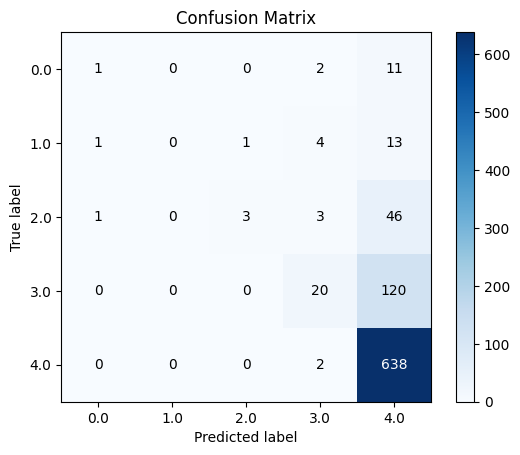

In [27]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
import numpy as np

#Plot a confusion matrix for the validation set
skplt.metrics.plot_confusion_matrix(
    Y_actual_val, Y_preds_val
)

In [28]:
Y_actual_test, Y_preds_test = MakePredictions(embed_classifier, test_loader)

In [ ]:
#Write code to get full classification report and print a confusion matrix for test set
acc = accuracy_score(Y_actual_test, Y_preds_test)
report = classification_report(Y_actual_test, Y_preds_test)
conf = confusion_matrix(Y_actual_test, Y_preds_test)

 Accuracy

In [30]:
print(acc)

0.9296296296296296


Classification Report

In [31]:
print(report)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         5
         3.0       0.20      0.12      0.15         8
         4.0       0.95      1.00      0.97       250

    accuracy                           0.93       270
   macro avg       0.23      0.23      0.23       270
weighted avg       0.88      0.93      0.91       270



Confusion Matrix

In [32]:
print(conf)

[[  0   0   0   1   1]
 [  0   0   1   2   2]
 [  0   0   0   1   4]
 [  0   0   0   1   7]
 [  0   0   0   0 250]]


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

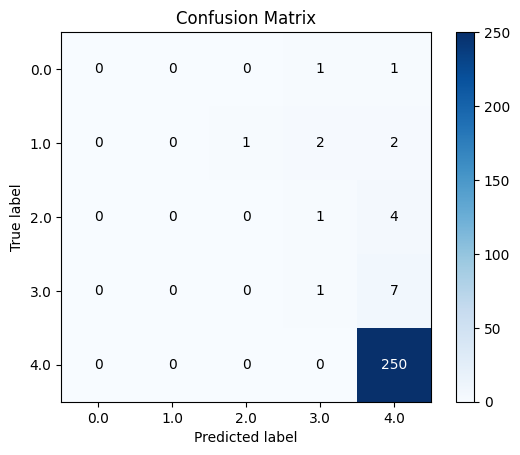

In [33]:
#Plot a confusion matrix for the test set
skplt.metrics.plot_confusion_matrix(
    Y_actual_test, Y_preds_test
)

## Question 1.4

See Latex document.